**L080_DBSCAN.ipynb**

2024 JUN 12

Tershire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df = pd.DataFrame(iris_dataset.data, columns=columns)
iris_df["target"] = iris_dataset.target

In [4]:
display(iris_df.head(3))

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# model

In [5]:
from sklearn.cluster import DBSCAN

In [6]:
dbscan = DBSCAN(eps=0.6, min_samples=8, metric="euclidean")

# training

In [7]:
dbscan_cluster_ids = dbscan.fit_predict(iris_dataset.data)

In [8]:
iris_df["dbscan_cluster_id"] = dbscan_cluster_ids

In [9]:
clustering_result = iris_df.groupby(["target"])["dbscan_cluster_id"].value_counts()
print(clustering_result)

target  dbscan_cluster_id
0        0                   49
        -1                    1
1        1                   46
        -1                    4
2        1                   42
        -1                    8
Name: count, dtype: int64


# training result

## visualization

In [10]:
def visualize_clustering(clusterer, dataframe, label_name, draw_centers=True):
    if draw_centers:
        centers = clusterer.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*']
    is_noise = False
    
    for label in unique_labels:
        cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            is_noise = True
            cluster_legend = "noise"
        else:
            cluster_legend = "cluster " + str(label)
        
        plt.scatter(x=cluster["feature1"], y=cluster["feature2"], s=70,
                    edgecolors='k', marker=markers[label], label=cluster_legend)

    if draw_centers:
        for i, center in enumerate(centers):
            # shape
            plt.scatter(x=center[0], y=center[1],
                        s=200, color="white", alpha=0.75,
                        edgecolors='k', marker=markers[i])
            # text
            plt.scatter(x=center[0], y=center[1],
                        s=70, color='k',
                        edgecolors='k', marker="$%d$" % i)

    if is_noise:
        legend_location = "upper center"
    else:
        legend_location = "upper right"

    plt.legend(loc=legend_location)
    plt.show()

### PCA

In [11]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(iris_dataset.data)

iris_df["feature1"] = X_pca[:, 0]
iris_df["feature2"] = X_pca[:, 1]

In [19]:
display(iris_df.head(3))

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster_id,feature_1,feature_2,feature1,feature2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949,-2.888991,-0.144949


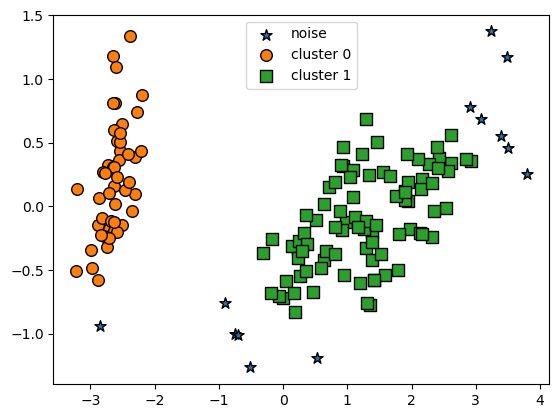

In [20]:
visualize_clustering(dbscan, iris_df, "dbscan_cluster_id", False)

# hyperparameters tweak

## 1. increase eps

In [21]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric="euclidean")

dbscan_cluster_ids = dbscan.fit_predict(iris_dataset.data)
iris_df["dbscan_cluster_id"] = dbscan_cluster_ids

In [22]:
clustering_result = iris_df.groupby(["target"])["dbscan_cluster_id"].value_counts()
print(clustering_result)

target  dbscan_cluster_id
0        0                   50
1        1                   50
2        1                   47
        -1                    3
Name: count, dtype: int64


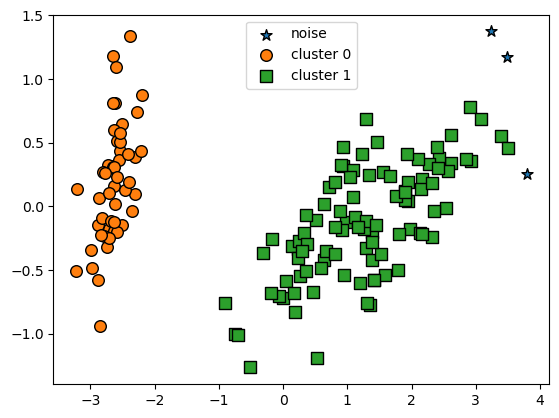

In [23]:
visualize_clustering(dbscan, iris_df, "dbscan_cluster_id", False)

## 2. increase min_samples

In [24]:
dbscan = DBSCAN(eps=0.6, min_samples=14, metric="euclidean")

dbscan_cluster_ids = dbscan.fit_predict(iris_dataset.data)
iris_df["dbscan_cluster_id"] = dbscan_cluster_ids

In [25]:
clustering_result = iris_df.groupby(["target"])["dbscan_cluster_id"].value_counts()
print(clustering_result)

target  dbscan_cluster_id
0        0                   48
        -1                    2
1        1                   44
        -1                    6
2        1                   37
        -1                   13
Name: count, dtype: int64


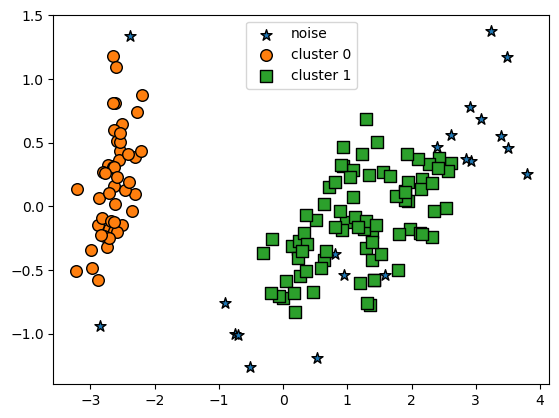

In [26]:
visualize_clustering(dbscan, iris_df, "dbscan_cluster_id", False)

# data: circles

In [27]:
from sklearn.datasets import make_circles

In [29]:
X, Y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
dataset_df = pd.DataFrame(data=X, columns=['feature1', 'feature2'])
dataset_df['target'] = Y

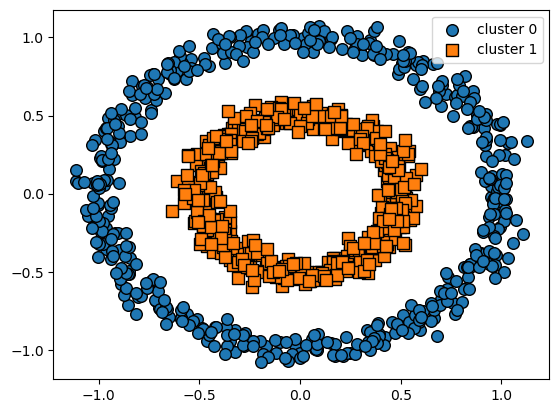

In [31]:
visualize_clustering(dbscan, dataset_df, "target", False)

# model: {K-Means, GMM, DBSCAN} comparison

## model 1: K-Means

In [32]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_cluster_ids = kmeans.fit_predict(X)

dataset_df["kmeans_cluster_id"] = kmeans_cluster_ids

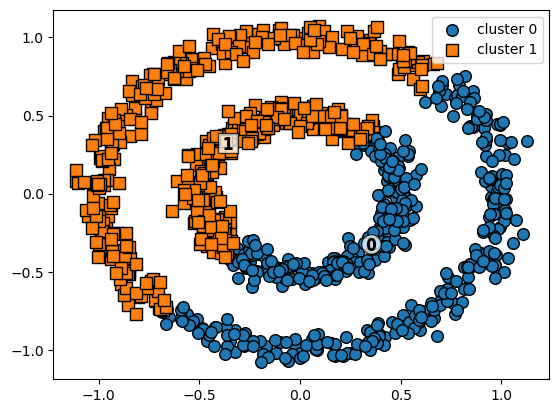

In [35]:
visualize_clustering(kmeans, dataset_df, "kmeans_cluster_id", True)

## model 2: GMM

In [36]:
from sklearn.mixture import GaussianMixture

In [37]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_cluster_ids = gmm.fit_predict(X)

dataset_df["gmm_cluster_id"] = gmm_cluster_ids

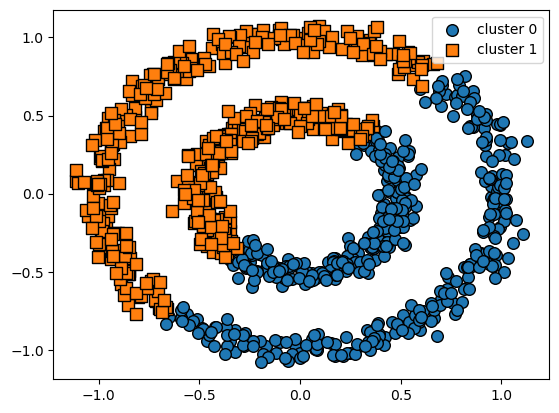

In [39]:
visualize_clustering(gmm, dataset_df, "gmm_cluster_id", False)

## model 3: DBSCAN

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric="euclidean")
dbscan_cluster_ids = dbscan.fit_predict(X)

dataset_df["dbscan_cluster_id"] = dbscan_cluster_ids

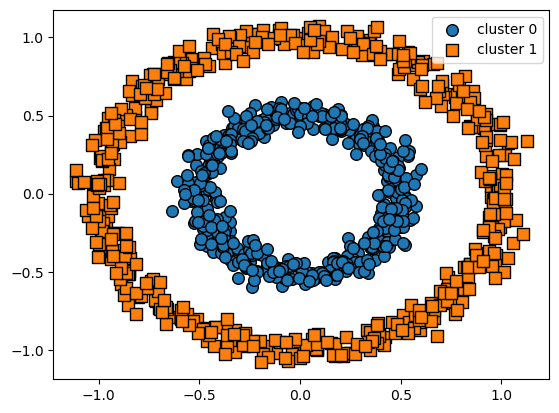

In [42]:
visualize_clustering(dbscan, dataset_df, "dbscan_cluster_id", False)